In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Import dataset
df = pd.read_csv("C:\\Users\\DELL5490\\Desktop\\Master2\\Quadramind\\Quadramind\\Kafka\\mimic_2425.csv", )
print (df.head())
df = pd.DataFrame(df)



            Unnamed: 0    RR   SPO2   MAP   SBP   DBP     HR    PP       CO
0  2020-10-18 15:24:25  35.0   99.9   0.0   0.0   0.0  106.9   0.0     0.00
1  2020-10-18 15:25:25  36.4  100.0  87.0  98.9  63.1  107.3  35.8  3841.34
2  2020-10-18 15:26:25  35.2  100.0  75.2  97.9  63.0  107.5  34.9  3751.75
3  2020-10-18 15:27:25  34.0  100.0  74.8  97.2  62.5  107.0  34.7  3712.90
4  2020-10-18 15:28:25  34.9  100.0  74.0  96.0  62.0  107.0  34.0  3638.00


In [3]:
# Categorize the data records
def categorize_blood_pressure(row):
    sbp = row["SBP"]
    dbp = row["DBP"]
    
    if sbp > 180 or dbp > 120:
        return "Hypertensive Crisis"
    elif sbp >= 140 or dbp >= 90:
        return "Hypertension Stage 2"
    elif sbp >= 130 or dbp >= 80:
        return "Hypertension Stage 1"
    elif 120 <= sbp <= 130 and dbp < 80:
        return "Elevated"
    elif sbp < 120 and dbp < 80:
        return "Normal"
    else:
        return "Uncategorized"

# Apply the categorize_blood_pressure function to each row and create a new 'Category' column
df["Class"] = df.apply(categorize_blood_pressure, axis=1)

# Print the updated DataFrame
print(df)


                Unnamed: 0    RR   SPO2   MAP   SBP   DBP     HR    PP  \
0      2020-10-18 15:24:25  35.0   99.9   0.0   0.0   0.0  106.9   0.0   
1      2020-10-18 15:25:25  36.4  100.0  87.0  98.9  63.1  107.3  35.8   
2      2020-10-18 15:26:25  35.2  100.0  75.2  97.9  63.0  107.5  34.9   
3      2020-10-18 15:27:25  34.0  100.0  74.8  97.2  62.5  107.0  34.7   
4      2020-10-18 15:28:25  34.9  100.0  74.0  96.0  62.0  107.0  34.0   
...                    ...   ...    ...   ...   ...   ...    ...   ...   
12872  2020-10-27 13:56:25  16.2   95.8  61.1  79.7  51.1  104.6  28.6   
12873  2020-10-27 13:57:25  17.4   96.0  61.5  80.4  51.4  104.1  29.0   
12874  2020-10-27 13:58:25  17.3   96.0  59.8  78.5  50.3  103.9  28.2   
12875  2020-10-27 13:59:25  16.0   95.9  60.1  78.0  50.4  103.1  27.6   
12876  2020-10-27 14:00:25  15.2   96.0  61.8  80.7  51.9  104.7  28.8   

            CO   Class  
0         0.00  Normal  
1      3841.34  Normal  
2      3751.75  Normal  
3      3712

In [4]:
# Export the DataFrame to a new CSV file
df.to_csv("mimic_final.csv", index=False)

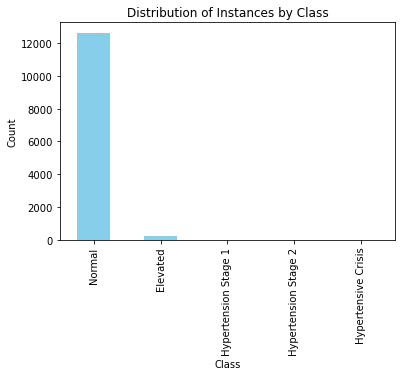

In [5]:
# Plot histograms for each category
df['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Instances by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [6]:
# Table plot

table_data = pd.DataFrame(df['Class'].value_counts()).reset_index()
table_data.columns = ['Class', 'Count']
styled_table = table_data.style.background_gradient(cmap='Blues', subset=['Count'])
styled_table.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey')]}
])
styled_table.set_properties(**{'text-align': 'center'})
styled_table.set_caption('Distribution Table')

# Display the table
display(styled_table)


,Class,Count
0,Normal,12635
1,Elevated,227
2,Hypertension Stage 1,10
3,Hypertension Stage 2,3
4,Hypertensive Crisis,2
